In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import geopandas as gpd
import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim
from collections import defaultdict

In [2]:
df = pd.read_csv('movie_dataset.csv')
df.head(2)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski


In [3]:
df['release_date'] = pd.to_datetime(df['release_date'], errors = 'coerce')
df['year'] = df['release_date'].dt.year

In [5]:
df.head(2)['production_countries']

0    [{"iso_3166_1": "US", "name": "United States o...
1    [{"iso_3166_1": "US", "name": "United States o...
Name: production_countries, dtype: object

In [6]:
def top_genres_by_year(df, top_n = 3):
    """Extracts and returns the most popular genres for each year"""
    genre_by_year = {}
    for year, subset in df.groupby('year'):
        genre_list = ' '.join(subset['genres'].dropna()).split()
        genre_count = Counter(genre_list)
        top_genres = genre_count.most_common(top_n)
        genre_by_year[year] = top_genres
    return genre_by_year

top_genres_data = top_genres_by_year(df)
top_genres_df = pd.DataFrame([
    {'Year': year, 'Genre': genre, 'Count': count}
    for year, genres in top_genres_data.items()
    for genre, count in genres
])

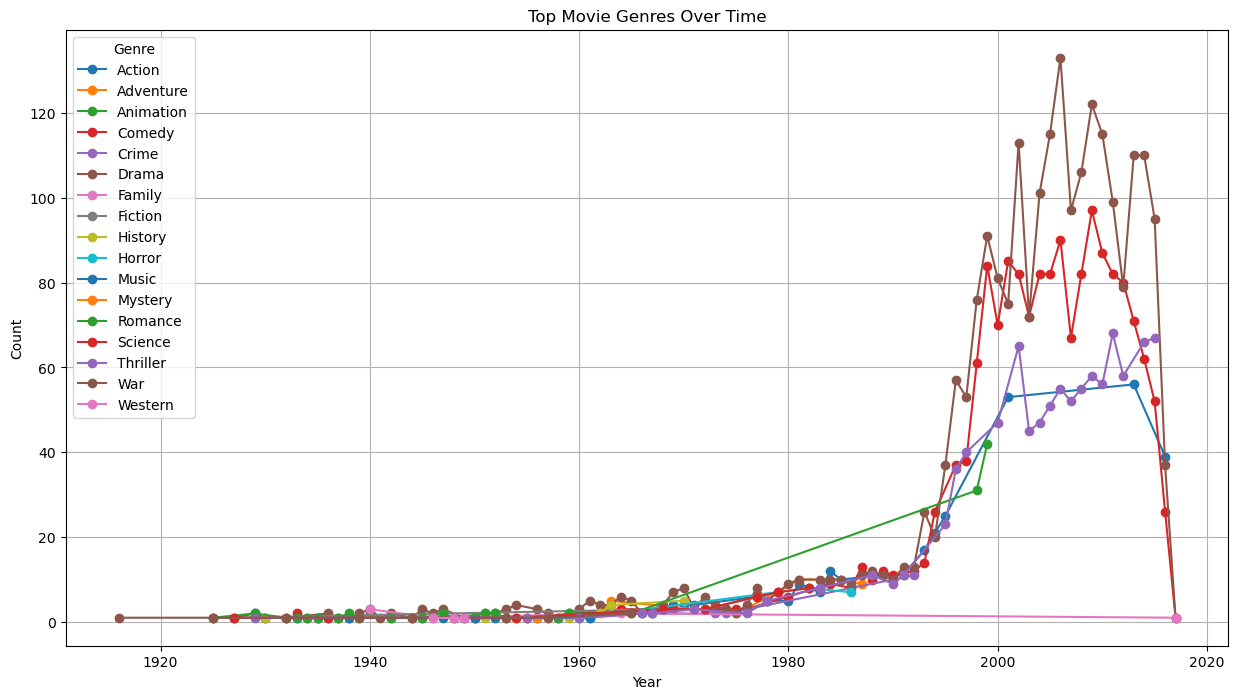

In [7]:
# Visualization
plt.figure(figsize=(15, 8))
for genre, subset in top_genres_df.groupby('Genre'):
    plt.plot(subset['Year'], subset['Count'], marker='o', label=genre)
plt.title('Top Movie Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Genre')
plt.grid(True)
plt.show()

In [8]:
# Display a sample of the results
print(top_genres_df.pivot(index='Year', columns='Genre', values='Count').fillna(0).astype(int).tail())

Genre   Action  Adventure  Animation  Comedy  Crime  Drama  Family  Fiction  \
Year                                                                          
2013.0      56          0          0      71      0    110       0        0   
2014.0       0          0          0      62      0    110       0        0   
2015.0       0          0          0      52      0     95       0        0   
2016.0      39          0          0      26      0     37       0        0   
2017.0       0          0          0       1      0      1       1        0   

Genre   History  Horror  Music  Mystery  Romance  Science  Thriller  War  \
Year                                                                       
2013.0        0       0      0        0        0        0         0    0   
2014.0        0       0      0        0        0        0        66    0   
2015.0        0       0      0        0        0        0        67    0   
2016.0        0       0      0        0        0        0         

In [7]:
geolocator = Nominatim(user_agent = "geoapiExercises")

In [23]:
def get_location(country):
    try:
        location = geolocator.geocode(country)
        return location.latitude, location.longitude
    except:
        return None, None

country_coords = defaultdict(list)
countries = df['production_countries']

countries_list = []
# for value in countries:
#     # value is a list of dictionaries, loop over each dictionary
#     for country in value:
#         countries_list.append(country.get('name', ''))

countries[0]

'[{"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "GB", "name": "United Kingdom"}]'

In [ ]:
prod_countries = set(df['production_countries'])
# print the number of unique production countries
print(len(prod_countries))
# use a for loop to get the coordinates
for i, country in enumerate(prod_countries):
    lat, lon = get_location(country)
    print(f'{i+1}/{len(prod_countries)}: {country} -> {lat}, {lon}')
    if lat and lon:
        country_coords['Country'].append(country)

In [ ]:
heatmap_data = []
for index, row in df.iterrows():
    coords = country_coords.get(row['production_countries'])
    if coords:
        heatmap_data.append(coords)

In [ ]:
map = folium.Map(location=[20, 0], zoom_start=2)

In [ ]:
HeatMap(heatmap_data).add_to(map)

In [ ]:
map.save('heatmap.html')